<a href="https://colab.research.google.com/github/shrirampiyer/Video-games-Sales-prediction/blob/main/video_games_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
library(dplyr)
library(tidyr)
library(stringr)
library(ggplot2)
library(corrplot)
library(dummies)
library(broom)
library(mice)
library(DataExplorer)
library(gridExtra)
library(caret)
library(RColorBrewer)
library(missForest)
library(caTools)
library(jtools)
library(randomForest)
library(e1071)
library(ROCR)
library(klaR)


In [30]:
sales_data <- read.csv("/content/M4_Videogame.csv")


In [31]:
glimpse(sales_data)

Rows: 16,719
Columns: 17
$ X               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Name            <chr> "Wii Sports", "Super Mario Bros.", "Mario Kart Wii", "…
$ Platform        <chr> "Wii", "NES", "Wii", "Wii", "GB", "GB", "DS", "Wii", "…
$ Year_of_Release <chr> "2006", "1985", "2008", "2009", "1996", "1989", "2006"…
$ Genre           <chr> "Sports", "Platform", "Racing", "Sports", "Role-Playin…
$ Publisher       <chr> "Nintendo", "Nintendo", "Nintendo", "Nintendo", "Ninte…
$ NA_players      <dbl> 41.36, 29.08, 15.68, 15.61, 11.27, 23.20, 11.28, 13.96…
$ EU_players      <dbl> 28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, 9.18, 6.9…
$ JP_players      <dbl> 3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.50, 2.93, 4.70,…
$ Other_players   <dbl> 8.45, 0.77, 3.29, 2.95, 1.00, 0.58, 2.88, 2.84, 2.24, …
$ Global_players  <dbl> 82.53, 40.24, 35.52, 32.77, 31.37, 30.26, 29.80, 28.92…
$ Critic_Score    <int> 76, NA, 82, 80, NA, NA, 89, 58, 87, NA, NA, 91, NA, 80…
$ Critic_Count 

In [32]:
sales_data$Platform = as.factor(sales_data$Platform)
sales_data$Year_of_Release = as.numeric(sales_data$Year_of_Release)
sales_data$Genre = as.factor(sales_data$Genre)
sales_data$Publisher = as.factor(sales_data$Publisher)
sales_data$Developer=as.factor(sales_data$Developer)
sales_data$Rating=as.factor(sales_data$Rating)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [33]:
sales_data %>% summarise(n_distinct(Name))

n_distinct(Name)
<int>
11563


In [34]:
sales_data <- subset(sales_data, sales_data$Platform != "PS2")
sales_data %>%
  group_by(Platform) %>%
  summarise(Count = n(),Perc=round(n()/nrow(.)*100,2)) %>%
  arrange(desc(Count))

Platform,Count,Perc
<fct>,<int>,<dbl>
DS,2152,14.78
PS3,1331,9.14
Wii,1320,9.07
X360,1262,8.67
PSP,1209,8.30
PS,1197,8.22
PC,974,6.69
XB,824,5.66
GBA,822,5.65


In [35]:
sales_data %>%
  group_by(Genre) %>%
  summarise(Count = n(),Perc=round(n()/nrow(.)*100,2)) %>%
  arrange(desc(Count))

Genre,Count,Perc
<fct>,<int>,<dbl>
Action,3022,20.76
Sports,1948,13.38
Misc,1528,10.50
Role-Playing,1313,9.02
Shooter,1163,7.99
Adventure,1107,7.60
Racing,1033,7.10
Platform,785,5.39
Simulation,784,5.39


In [36]:
sales_data %>%
  group_by(Publisher) %>%
  summarise(Count = n(),Perc=round(n()/nrow(.)*100,2)) %>%
  arrange(desc(Count))

Publisher,Count,Perc
<fct>,<int>,<dbl>
Electronic Arts,1157,7.95
Activision,882,6.06
Ubisoft,863,5.93
Namco Bandai Games,832,5.72
Nintendo,706,4.85
Konami Digital Entertainment,671,4.61
THQ,615,4.22
Sega,555,3.81
Sony Computer Entertainment,483,3.32


In [37]:
sales_data %>%
  group_by(Developer) %>%
  summarise(Count = n(),Perc=round(n()/nrow(.)*100,2)) %>%
  arrange(desc(Count))

Developer,Count,Perc
<fct>,<int>,<dbl>
,5943,40.82
Ubisoft,188,1.29
EA Canada,136,0.93
EA Sports,133,0.91
Konami,127,0.87
Capcom,107,0.73
Ubisoft Montreal,96,0.66
Electronic Arts,90,0.62
EA Tiburon,86,0.59


In [11]:
sales_data %>%
  group_by(Rating) %>%
  summarise(Count = n(),Perc=round(n()/nrow(.)*100,2)) %>%
  arrange(desc(Count))

Rating,Count,Perc
<fct>,<int>,<dbl>
,6089,41.83
E,3435,23.60
T,2385,16.38
M,1340,9.20
E10+,1295,8.90
EC,7,0.05
K-A,3,0.02
RP,3,0.02
AO,1,0.01


In [12]:
sales_data %>%
  summarise(is_NULL=sum(is.na(NA_players)==1),
            is_NOT_NULL=sum(!is.na(NA_players)==1)
            )

is_NULL,is_NOT_NULL
<int>,<int>
0,14558


In [13]:
sales_data%>%
  filter(!is.na(NA_players))%>%
  summarise(
    Max=max(NA_players),
    Min=min(NA_players),
    Mean=mean(NA_players),
    Median=median(NA_players),
    QUA1=quantile(NA_players,1/4),
    QUA3=quantile(NA_players,3/4),
    IQR=IQR(NA_players)
)

Max,Min,Mean,Median,QUA1,QUA3,IQR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41.36,0,0.2623149,0.08,0,0.23,0.23


In [14]:
sales_data %>%
  summarise(is_NULL=sum(is.na(EU_players)==1),
            is_NOT_NULL=sum(!is.na(EU_players)==1)
            )

is_NULL,is_NOT_NULL
<int>,<int>
0,14558


In [15]:
sales_data%>%
  filter(!is.na(EU_players))%>%
  summarise(
    Max=max(EU_players),
    Min=min(EU_players),
    Mean=mean(EU_players),
    Median=median(EU_players),
    QUA1=quantile(EU_players,1/4),
    QUA3=quantile(EU_players,3/4),
    IQR=IQR(EU_players)
)

Max,Min,Mean,Median,QUA1,QUA3,IQR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28.96,0,0.1432463,0.02,0,0.1,0.1


In [16]:
sales_data %>%
  summarise(is_NULL=sum(is.na(JP_players)==1),
            is_NOT_NULL=sum(!is.na(JP_players)==1)
            )

is_NULL,is_NOT_NULL
<int>,<int>
0,14558


In [17]:
sales_data %>%
  filter(!is.na(JP_players))%>%
  summarise(
    Max=max(JP_players),
    Min=min(JP_players),
    Mean=mean(JP_players),
    Median=median(JP_players),
    QUA1=quantile(JP_players,1/4),
    QUA3=quantile(JP_players,3/4),
    IQR=IQR(JP_players)
)

Max,Min,Mean,Median,QUA1,QUA3,IQR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.22,0,0.07955969,0,0,0.04,0.04


In [18]:
sales_data %>%
  summarise(is_NULL=sum(is.na(Other_players)==1),
            is_NOT_NULL=sum(!is.na(Other_players)==1)
            )

is_NULL,is_NOT_NULL
<int>,<int>
0,14558


In [19]:
sales_data %>%
  filter(!is.na(Other_players))%>%
  summarise(
    Max=max(Other_players),
    Min=min(Other_players),
    Mean=mean(Other_players),
    Median=median(Other_players),
    QUA1=quantile(Other_players,1/4),
    QUA3=quantile(Other_players,3/4),
    IQR=IQR(Other_players)
)

Max,Min,Mean,Median,QUA1,QUA3,IQR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.45,0,0.0410702,0.01,0,0.03,0.03


In [20]:
sales_data %>%
  summarise(is_NULL=sum(is.na(Global_players)==1),
            is_NOT_NULL=sum(!is.na(Global_players)==1)
            )


is_NULL,is_NOT_NULL
<int>,<int>
0,14558


In [21]:
sales_data%>%
  filter(!is.na(Global_players))%>%
  summarise(
    Max=max(Global_players),
    Min=min(Global_players),
    Mean=mean(Global_players),
    Median=median(Global_players),
    QUA1=quantile(Global_players,1/4),
    QUA3=quantile(Global_players,3/4),
    IQR=IQR(Global_players)
)


Max,Min,Mean,Median,QUA1,QUA3,IQR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
82.53,0.01,0.5264913,0.16,0.06,0.45,0.39


In [22]:
sales_data %>%
  summarise(is_NULL=sum(is.na(Critic_Score)==1),
            is_NOT_NULL=sum(!is.na(Critic_Score)==1)
            )

is_NULL,is_NOT_NULL
<int>,<int>
7719,6839


In [23]:
sales_data %>%
  filter(!is.na(Critic_Score))%>%
  summarise(
    Max=max(Critic_Score),
    Min=min(Critic_Score),
    Mean=mean(Critic_Score),
    Median=median(Critic_Score),
    QUA1=quantile(Critic_Score,1/4),
    QUA3=quantile(Critic_Score,3/4),
    IQR=IQR(Critic_Score)
)

Max,Min,Mean,Median,QUA1,QUA3,IQR
<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
98,13,69.01331,71,60,80,20


In [24]:
sales_data %>%
  summarise(is_NULL=sum(is.na(Critic_Count)==1),
            is_NOT_NULL=sum(!is.na(Critic_Count)==1)
            )

is_NULL,is_NOT_NULL
<int>,<int>
7719,6839


In [25]:
sales_data %>%
  filter(!is.na(Critic_Count))%>%
  summarise(
    Max=max(Critic_Count),
    Min=min(Critic_Count),
    Mean=mean(Critic_Count),
    Median=median(Critic_Count),
    QUA1=quantile(Critic_Count,1/4),
    QUA3=quantile(Critic_Count,3/4),
    IQR=IQR(Critic_Count)
)

Max,Min,Mean,Median,QUA1,QUA3,IQR
<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
113,3,26.89867,22,11,38,27


In [26]:
sales_data %>%
  summarise(is_NULL=sum(is.na(User_Score)==1),
            is_NOT_NULL=sum(!is.na(User_Score)==1),
            is_tbd=sum(User_Score=="tbd")
            )

is_NULL,is_NOT_NULL,is_tbd
<int>,<int>,<int>
0,14558,2185


In [27]:
sales_data %>%
  mutate(User_Score = as.numeric(User_Score)) %>%
  filter(!is.na(User_Score) & User_Score!="tbd") %>%
  summarise(
    Max=max(User_Score),
    Min=min(User_Score),
    Mean=mean(User_Score),
    Median=median(User_Score),
    QUA1=quantile(User_Score,1/4),
    QUA3=quantile(User_Score,3/4),
    IQR=IQR(User_Score)
  )

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Max,Min,Mean,Median,QUA1,QUA3,IQR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.7,0,7.026965,7.4,6.3,8.1,1.8


In [28]:
sales_data %>%
  summarise(is_NULL=sum(is.na(User_Count)==1),
            is_NOT_NULL=sum(!is.na(User_Count)==1)
            )

is_NULL,is_NOT_NULL
<int>,<int>
8209,6349


In [29]:
sales_data %>%
  filter(!is.na(User_Count))%>%
  summarise(
    Max=max(User_Count),
    Min=min(User_Count),
    Mean=mean(User_Count),
    Median=median(User_Count),
    QUA1=quantile(User_Count,1/4),
    QUA3=quantile(User_Count,3/4),
    IQR=IQR(User_Count)
)

Max,Min,Mean,Median,QUA1,QUA3,IQR
<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
10665,4,185.4054,27,10,97,87


In [30]:
summary(sales_data)


       X             Name              Platform    Year_of_Release
 Min.   :    1   Length:14558       DS     :2152   Min.   :1980   
 1st Qu.: 4320   Class :character   PS3    :1331   1st Qu.:2003   
 Median : 8606   Mode  :character   Wii    :1320   Median :2008   
 Mean   : 8490                      X360   :1262   Mean   :2007   
 3rd Qu.:12670                      PSP    :1209   3rd Qu.:2011   
 Max.   :16719                      PS     :1197   Max.   :2020   
                                    (Other):6087   NA's   :235    
          Genre                             Publisher      NA_players     
 Action      :3022   Electronic Arts             :1157   Min.   : 0.0000  
 Sports      :1948   Activision                  : 882   1st Qu.: 0.0000  
 Misc        :1528   Ubisoft                     : 863   Median : 0.0800  
 Role-Playing:1313   Namco Bandai Games          : 832   Mean   : 0.2623  
 Shooter     :1163   Nintendo                    : 706   3rd Qu.: 0.2300  
 Adventure   :

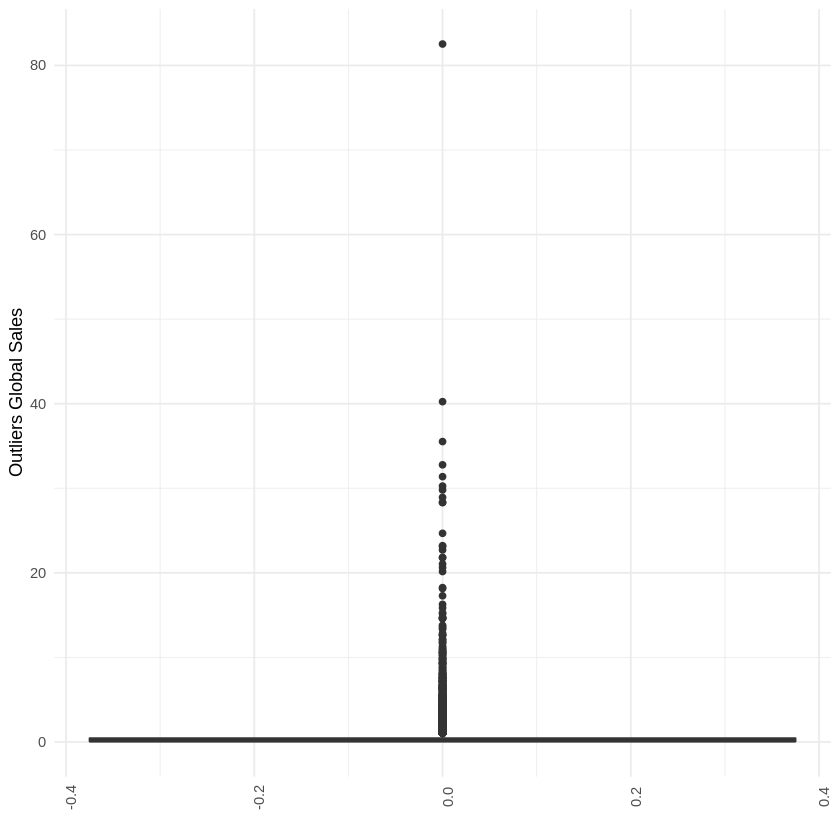

In [31]:
outlier_global_players <- qplot(y = Global_players, ylab = "Outliers Global Sales", data = sales_data, geom = "boxplot", fill=I("tomato")) + theme_minimal() + theme(axis.text.x = element_text(angle = 90))

outlier_global_players

In [32]:
sales_data = subset(sales_data, select = -c(NA_players,EU_players,JP_players,Other_players))


In [33]:
sales_data <- subset(sales_data, sales_data$Platform != "PCFX")
sales_data <- subset(sales_data, sales_data$Platform != "GG")


In [34]:
sales_data$Year_of_Release <- 2021 
names(sales_data)[3] <- "Age"

In [35]:
sales_data <- subset(sales_data, sales_data$Name != "" | sales_data$Genre != "")


In [36]:
is.na(sales_data) <- sales_data == ''


In [37]:
sales_data$User_Score <- as.character(sales_data$User_Score)
sales_data$User_Score[sales_data$User_Score == "tbd"] <- ""

In [38]:
sales_data$User_Score=as.double(sales_data$User_Score)

df_imputation <- data.frame(sales_data$Age, sales_data$Rating, sales_data$Critic_Score, sales_data$Critic_Count, sales_data$User_Score, sales_data$User_Count)
names(df_imputation) <- c("Age_imp","Rating_imp", "Critic_Score_imp", "Critic_Count_imp", "User_Score_imp", "User_Count_imp")

df_imputation$Rating_imp = factor(df_imputation$Rating_imp, 
                       levels = c('AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'), labels = c(1, 2, 3, 4, 5, 6, 7, 8))

In [39]:
md.pattern(df_imputation)
df_imputation_imp <- mice(df_imputation, m=5, seed = 123)
df_imputation <- complete(df_imputation_imp, 1)
plot_missing(df_imputation)


ERROR: ignored

In [40]:
df_imputation$Rating_imp = factor(df_imputation$Rating_imp, 
                       levels = c(1, 2, 3, 4, 5, 6, 7, 8), labels = c('AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'))
sales_data <- sales_data %>% mutate(ID = row_number())
df_imputation <- df_imputation %>% mutate(ID = row_number())
sales_data <- merge(sales_data,df_imputation,by="ID")
sales_data = subset(sales_data, select = -c(ID, Rating, Age, Critic_Score, Critic_Count, User_Score, User_Count))

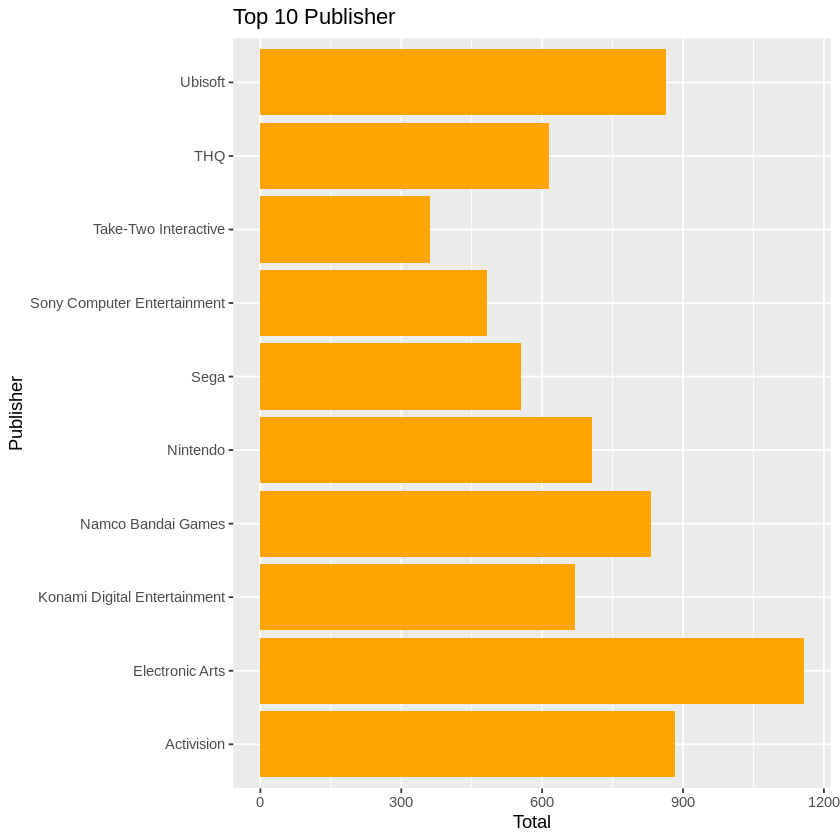

In [41]:
publisher_data <- sales_data %>%
  group_by(Publisher) %>%
  summarise(count = n()) %>%
  top_n(n = 10, wt = count)

publisher_charts <- ggplot(publisher_data, aes(x = Publisher, y = count, fill=count)) + geom_col(fill="orange")+
  labs(title = "Top 10 Publisher", x="Publisher",y="Total") + coord_flip()
publisher_charts


In [42]:
md.pattern(df_imputation)
df_imputation_imp <- mice(df_imputation, m=5, seed = 123)
df_imputation <- complete(df_imputation_imp, 1)
plot_missing(df_imputation)

ERROR: ignored

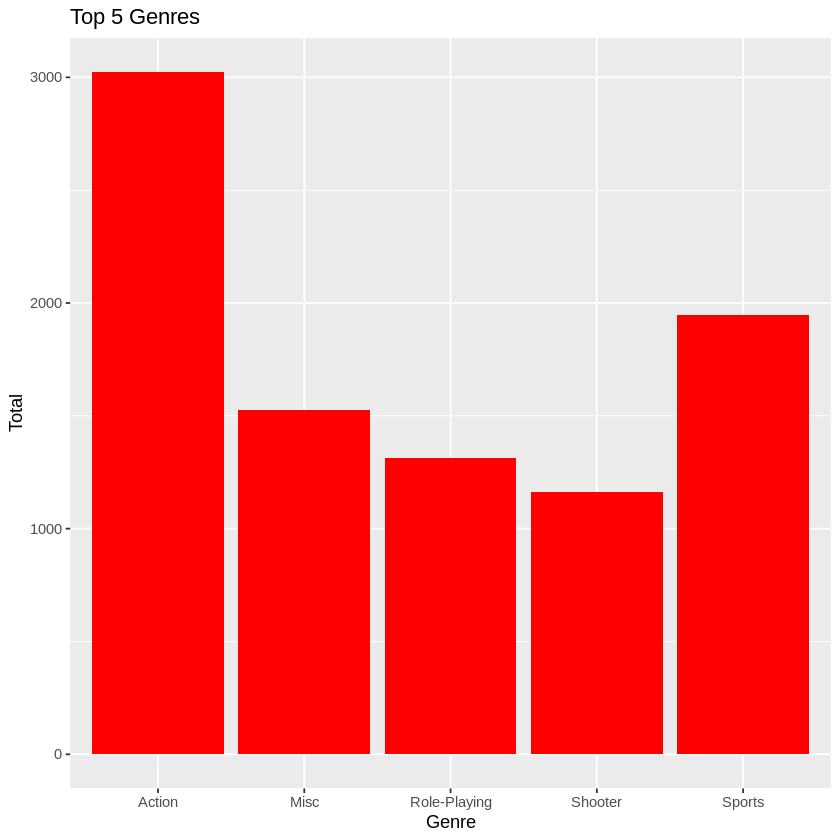

In [43]:
genre_data <- sales_data %>%
  group_by(Genre) %>%
  summarise(count = n()) %>%
  top_n(n = 5, wt = count)

genre_charts <- ggplot(genre_data, aes(x = Genre, y = count, fill=count)) + geom_col(fill="red")+
  labs(title = "Top 5 Genres", x="Genre",y="Total")
genre_charts

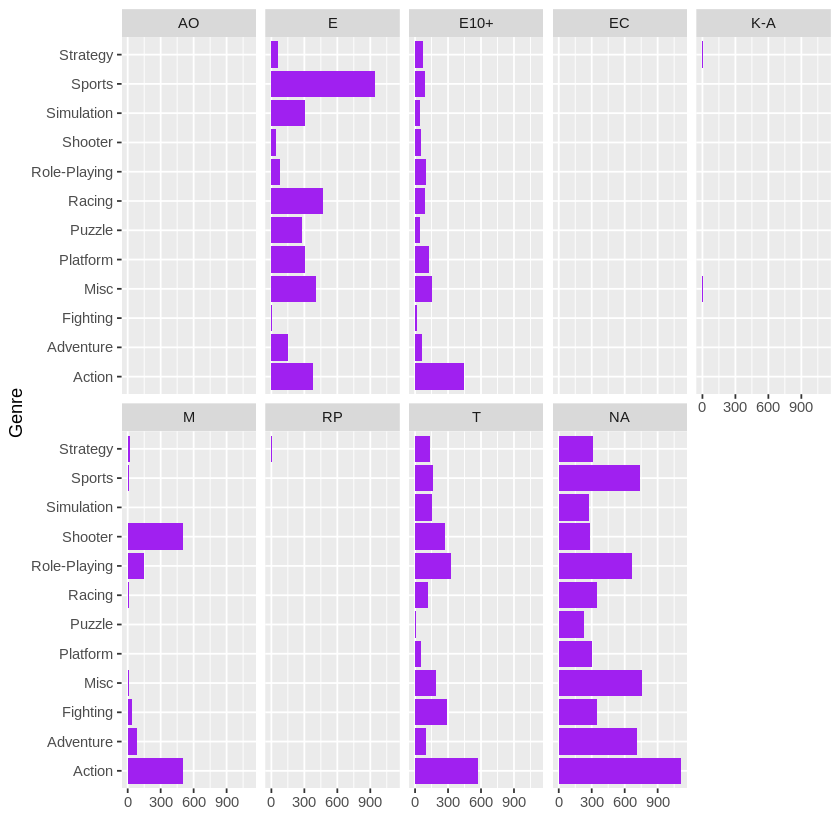

In [44]:
qplot(x = Genre, data = sales_data) + geom_bar(fill = "purple") + coord_flip()  + facet_wrap(~Rating_imp, nrow = 2)

In [103]:
sales_data

ID,X,Name,Year_of_Release,Genre,Publisher,Global_players,Developer,Age_imp.x,Rating_imp.x,⋯,Critic_Count_imp.x,User_Score_imp.x,User_Count_imp.x,User_Score,Age_imp.y,Rating_imp.y,Critic_Score_imp.y,Critic_Count_imp.y,User_Score_imp.y,User_Count_imp.y
<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,⋯,<int>,<dbl>,<int>,<dbl>,<chr>,<fct>,<int>,<int>,<dbl>,<int>
1,1,Wii Sports,2021,Sports,Nintendo,82.53,Nintendo,Wii,NA,⋯,51,8.0,322,8.0,Wii,NA,76,51,8.0,322
2,2,Super Mario Bros.,2021,Platform,Nintendo,40.24,NA,NES,NA,⋯,NA,NA,NA,NA,NES,NA,NA,NA,NA,NA
3,3,Mario Kart Wii,2021,Racing,Nintendo,35.52,Nintendo,Wii,NA,⋯,73,8.3,709,8.3,Wii,NA,82,73,8.3,709
4,4,Wii Sports Resort,2021,Sports,Nintendo,32.77,Nintendo,Wii,NA,⋯,73,8.0,192,8.0,Wii,NA,80,73,8.0,192
5,5,Pokemon Red/Pokemon Blue,2021,Role-Playing,Nintendo,31.37,NA,GB,NA,⋯,NA,NA,NA,NA,GB,NA,NA,NA,NA,NA
6,6,Tetris,2021,Puzzle,Nintendo,30.26,NA,GB,NA,⋯,NA,NA,NA,NA,GB,NA,NA,NA,NA,NA
7,7,New Super Mario Bros.,2021,Platform,Nintendo,29.80,Nintendo,DS,NA,⋯,65,8.5,431,8.5,DS,NA,89,65,8.5,431
8,8,Wii Play,2021,Misc,Nintendo,28.92,Nintendo,Wii,NA,⋯,41,6.6,129,6.6,Wii,NA,58,41,6.6,129
9,9,New Super Mario Bros. Wii,2021,Platform,Nintendo,28.32,Nintendo,Wii,NA,⋯,80,8.4,594,8.4,Wii,NA,87,80,8.4,594


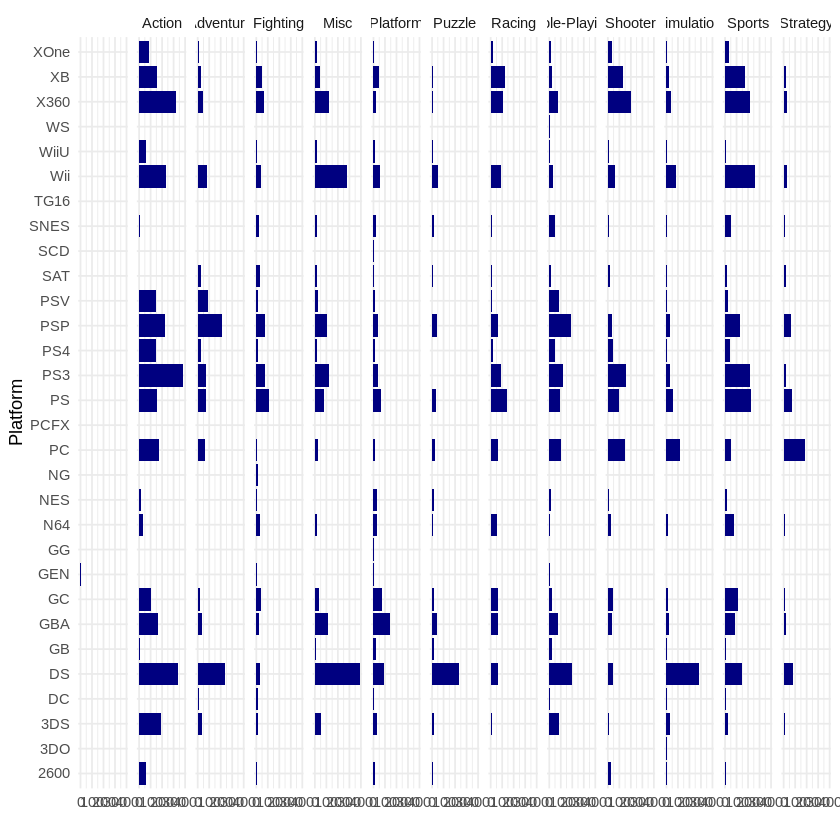

In [38]:
qplot(x=Platform,data=sales_data)+ geom_bar(fill="navy") + theme(axis.text = element_text) + coord_flip() + theme_minimal() + facet_wrap(~Genre,nrow=1)

In [39]:
cor_df <- data.frame(sales_data$Age_imp, sales_data$Critic_Score_imp, sales_data$Critic_Count_imp, sales_data$User_Score_imp, sales_data$User_Count_imp, sales_data$Global)
cor_matrix<-cor(cor_df)
corrplot(cor_matrix, diag = FALSE, order = "FPC", tl.pos = "td", tl.cex = 0.5, method = "circle",type="upper")


ERROR: ignored

In [68]:
install.packages('caTools')
library(caTools)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
sales_dataset1 = subset(sales_data, select = -c(Name, Publisher, Developer))

### Exp 1 - train:test 70:30, seed 555
set.seed(555)
split = sample.split(sales_dataset1$Global, SplitRatio = 0.7)
train_dataset1 = subset(sales_dataset1, split == TRUE)
test_dataset1 = subset(sales_dataset1, split == FALSE)



In [41]:
regressor1 = lm(formula = Global_players ~ .,
               data = train_dataset1)
summary(regressor1)
summ(regressor1, confint = TRUE)


y1 = predict(regressor1, train_dataset1)
table(y1, train_dataset1$Global_players)

y_pred1 = predict(regressor1, test_dataset1)
table(y_pred1, test_dataset1$Global_players)


Call:
lm(formula = Global_players ~ ., data = train_dataset1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0200410 -0.0015193 -0.0002901  0.0011398  0.0197878 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        1.105e-01  8.806e-02    1.255   0.2097    
X                  1.303e-07  2.799e-08    4.657 3.32e-06 ***
PlatformDC        -1.620e-03  2.349e-03   -0.690   0.4905    
PlatformDS         2.210e-04  6.732e-04    0.328   0.7427    
PlatformGBA       -4.041e-04  8.485e-04   -0.476   0.6340    
PlatformGC        -1.931e-04  7.903e-04   -0.244   0.8069    
PlatformPC         5.020e-04  6.689e-04    0.750   0.4530    
PlatformPS        -1.443e-03  1.011e-03   -1.427   0.1536    
PlatformPS3        1.126e-04  6.253e-04    0.180   0.8571    
PlatformPS4        3.236e-04  7.170e-04    0.451   0.6518    
PlatformPSP        6.168e-04  6.959e-04    0.886   0.3755    
PlatformPSV        7.317e-04  8.537e-04    0.857   0.3

MODEL INFO:
Observations: 4062 (6173 missing obs. deleted)
Dependent Variable: Global_players
Type: OLS linear regression 

MODEL FIT:
F(127,3934) = 5312463.22, p = 0.00
R² = 1.00
Adj. R² = 1.00 

Standard errors: OLS
----------------------------------------------------------------
                           Est.    2.5%   97.5%    t val.      p
----------------------- ------- ------- ------- --------- ------
(Intercept)                0.11   -0.06    0.28      1.25   0.21
X                          0.00    0.00    0.00      4.66   0.00
PlatformDC                -0.00   -0.01    0.00     -0.69   0.49
PlatformDS                 0.00   -0.00    0.00      0.33   0.74
PlatformGBA               -0.00   -0.00    0.00     -0.48   0.63
PlatformGC                -0.00   -0.00    0.00     -0.24   0.81
PlatformPC                 0.00   -0.00    0.00      0.75   0.45
PlatformPS                -0.00   -0.00    0.00     -1.43   0.15
PlatformPS3                0.00   -0.00    0.00      0.18   0.86
Pl

ERROR: ignored

In [43]:

RMSE(y1, train_dataset1$Global_Sales)
# RMSE on test set
RMSE(y_pred1, test_dataset1$Global_Sales)
# MAE train dataset
MAE(y1, train_dataset1$Global_Sales)
# MAE test dataset
MAE(y_pred1, test_dataset1$Global_Sales)

ERROR: ignored

In [24]:
regressor1 = lm(formula = Global_Sales ~ .,
               data = train_dataset1)
summary(regressor1)
summ(regressor1, confint = TRUE)


y1 = predict(regressor1, train_dataset1)
table(y1, train_dataset1$Global_Sales)

y_pred1 = predict(regressor1, test_dataset1)
table(y_pred1, test_dataset1$Global_Sales)

ERROR: ignored